# Credit Card Default Prediction

## Scope

Do a feature engineering and binary classification on the Credit card default prediction dataset.

- Do basic EDA on features.

- Feature selection:- 

    1. Train test split
    
    2. Balance dataset
    
    3. Encode Ordinal and Nominal data into approppriate format.

    3. Check for correlation between features and target variable and select suitable features.
    
    4. Compare different classification models and choose most suitable.
    
    5. Choose final model and tune hyperparameters.

### Imports

In [1]:
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import json

import pickle as pk

In [2]:
print(f'pandas:{pd.__version__}')
print(f'numpy:{np.__version__}')
print(f'sklearn:{sklearn.__version__}')
print(f'imblearn:{imblearn.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'python:{sys.version}')

pandas:2.0.1
numpy:1.23.5
sklearn:1.2.2
imblearn:0.10.1
seaborn:0.12.2
python:3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]


## Path

<ins>**Change the BASE path to your folder location**</ins>

In [3]:
BASE = r"C:\\Users\\anand\\Documents\\Credit_card_default_prediction"

PATH = BASE + r"\\data\\processed\\"

EXPORT = BASE + r"\\data\\model\\"

## Read Data

In [4]:
# Read excel
df = pd.read_parquet(PATH + r"credit_card.pqt")

# Preview
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,0,0,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,0,0,0,0,0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
# Shape of data
df.shape

(30000, 24)

In [6]:
# Preview
df.head().T

,0,1,2,3,4
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,0.0,0.0,0.0,0.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,0.0,0.0,0.0,0.0,0.0
PAY_4,0.0,0.0,0.0,0.0,0.0
PAY_5,0.0,0.0,0.0,0.0,0.0


In [7]:
# Unique values and counts of grade
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

The goal is to predict which customers will be defaulted based on historical data.

## Train-test Split

We will be performing feature engineering after train-test split, on training dataset seperately, to make sure there is no information leakage during testing.

In [8]:
# Train-test split
X_train, X_test, y_train, y_test=train_test_split(
    df.drop('default.payment.next.month',axis=1), 
    df['default.payment.next.month'] , 
    test_size=0.3,
    random_state=43
)

In [9]:
# Length of training dataset
len(X_train)

22500

In [10]:
# Length of testing dataset
len(X_test)

7500

In [11]:
# Resetting indices
X_train = X_train.reset_index(drop=True)
X_test= X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000.0,2,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20000.0,1,3,2,47,1,2,0,0,0,...,17796.0,18729.0,19049.0,17300.0,0.0,1325.0,1258.0,1373.0,0.0,602.0
2,150000.0,2,1,1,34,0,0,0,0,0,...,127985.0,126207.0,126814.0,125640.0,54190.0,6000.0,5000.0,5000.0,5000.0,5000.0
3,130000.0,2,2,1,36,2,2,0,0,0,...,131073.0,132399.0,140254.0,139209.0,0.0,6230.0,5000.0,10200.0,4400.0,4570.0
4,50000.0,2,2,2,27,2,2,2,2,2,...,43264.0,43751.0,44731.0,45770.0,2100.0,2000.0,1500.0,2000.0,1900.0,1900.0


## Balancing dataset

In [12]:
# Distribution of grade
y_train.value_counts()

default.payment.next.month
0    17554
1     4946
Name: count, dtype: int64

We also see that the data is not very balanced in the training dataset. We will be oversample the dataset so that each class has equal samples.

**The testing dataset will not be balanced since it should reflect the real-world distribution fo data.**

In [13]:
# SMOTE sampling
ros = SMOTE(sampling_strategy='auto',random_state=43)

I used SMOTE algorithm for oversampling which created synthetic samples of minority class. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [14]:
# Resample dataest
X_train, y_train = ros.fit_resample(X_train, y_train)

In [15]:
# Length of dataset after sampling
len(X_train)

35108

In [16]:
# Unique value of grade after sampling
y_train.value_counts()

default.payment.next.month
0    17554
1    17554
Name: count, dtype: int64

The target variable is balanced for the training set.

## Encoding

In [17]:
# Columns list
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

The nominal columns have to be encoded using `OneHotEncoding`.

**OneHotEncoding will be done on training dataset first, then the same transformation will be applied to test data. This is to maintain feature consistency and prevent information leakage.**

In [18]:
# Nominal columns
nominal = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
]

# Preview
X_train[nominal].head()

,SEX,EDUCATION,MARRIAGE
0,2,1,1
1,1,3,2
2,2,1,1
3,2,2,1
4,2,2,2


In [19]:
# One hot encoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [20]:
# Created one hot encoded array
nom_array = ohe.fit_transform(X_train[nominal]).toarray()

# Preview
nom_array

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [21]:
# Names of encoded features
ohe.get_feature_names_out()

array(['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype=object)

In [22]:
# Drop original nominal columns
X_train = X_train.drop(nominal, axis = 1)

# Preview
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000.0,32,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20000.0,47,1,2,0,0,0,2,17629.0,17053.0,17796.0,18729.0,19049.0,17300.0,0.0,1325.0,1258.0,1373.0,0.0,602.0
2,150000.0,34,0,0,0,0,0,0,97874.0,130901.0,127985.0,126207.0,126814.0,125640.0,54190.0,6000.0,5000.0,5000.0,5000.0,5000.0
3,130000.0,36,2,2,0,0,0,2,131989.0,128467.0,131073.0,132399.0,140254.0,139209.0,0.0,6230.0,5000.0,10200.0,4400.0,4570.0
4,50000.0,27,2,2,2,2,2,2,41126.0,42244.0,43264.0,43751.0,44731.0,45770.0,2100.0,2000.0,1500.0,2000.0,1900.0,1900.0


In [23]:
# Encoded columns
nom_df = pd.DataFrame(nom_array,columns = ohe.get_feature_names_out())

# Preview
nom_df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Concat to original dataset
X_train = pd.concat([X_train,nom_df], axis=1)

# Preview
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,360000.0,32,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20000.0,47,1,2,0,0,0,2,17629.0,17053.0,...,602.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,150000.0,34,0,0,0,0,0,0,97874.0,130901.0,...,5000.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,130000.0,36,2,2,0,0,0,2,131989.0,128467.0,...,4570.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,50000.0,27,2,2,2,2,2,2,41126.0,42244.0,...,1900.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Doing the same transformation to test dataset

In [25]:
# Created one hot encoded array
test_array = ohe.transform(X_test[nominal]).toarray()

# Preview
test_array

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [26]:
# Drop original nominal columns
X_test = X_test.drop(nominal, axis = 1)

# Encoded columns
nom_df = pd.DataFrame(test_array,columns = ohe.get_feature_names_out())

# Concat to original dataset
X_test = pd.concat([X_test,nom_df], axis=1)

# Preview
X_test.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,120000.0,29,0,0,0,0,0,0,1914.0,573.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,210000.0,40,0,0,0,0,0,0,7542.0,-78.0,...,2005.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,40000.0,32,0,0,0,0,0,0,40368.0,38623.0,...,2221.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,90000.0,39,0,0,0,0,0,0,50477.0,22472.0,...,500.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,140000.0,33,0,0,0,0,0,0,27234.0,20191.0,...,821.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


After encoding, we have 29 columns. We will need to do some feature selection.

 ## Feature Selection

In [27]:
# Determine the mutual information
mutual_info = mutual_info_classif(X_train, np.ravel(y_train), random_state = 43)

# Preview
mutual_info

array([0.09901377, 0.00092504, 0.07150615, 0.07848057, 0.06505787,
       0.05608857, 0.05341693, 0.04294811, 0.01691416, 0.01985166,
       0.02055193, 0.01571497, 0.02476911, 0.02145378, 0.07766894,
       0.07129094, 0.07106647, 0.07650611, 0.07900115, 0.07700291,
       0.02639295, 0.02635856, 0.        , 0.00396218, 0.00637507,
       0.00114582, 0.02704337, 0.02049498, 0.0049421 ])

In [28]:
# Converting to dataframe
mutual_info = pd.Series(mutual_info)

# Preview
mutual_info.head()

0    0.099014
1    0.000925
2    0.071506
3    0.078481
4    0.065058
dtype: float64

In [29]:
# Setting column names to mutual information
mutual_info.index = X_train.columns

# Preview
mutual_info.head()

LIMIT_BAL    0.099014
AGE          0.000925
PAY_0        0.071506
PAY_2        0.078481
PAY_3        0.065058
dtype: float64

In [30]:
# Sort by descending order of mutual information
mutual_info = mutual_info.sort_values(ascending = False)

# Preview
mutual_info.head(10)

LIMIT_BAL    0.099014
PAY_AMT5     0.079001
PAY_2        0.078481
PAY_AMT1     0.077669
PAY_AMT6     0.077003
PAY_AMT4     0.076506
PAY_0        0.071506
PAY_AMT2     0.071291
PAY_AMT3     0.071066
PAY_3        0.065058
dtype: float64

<Axes: >

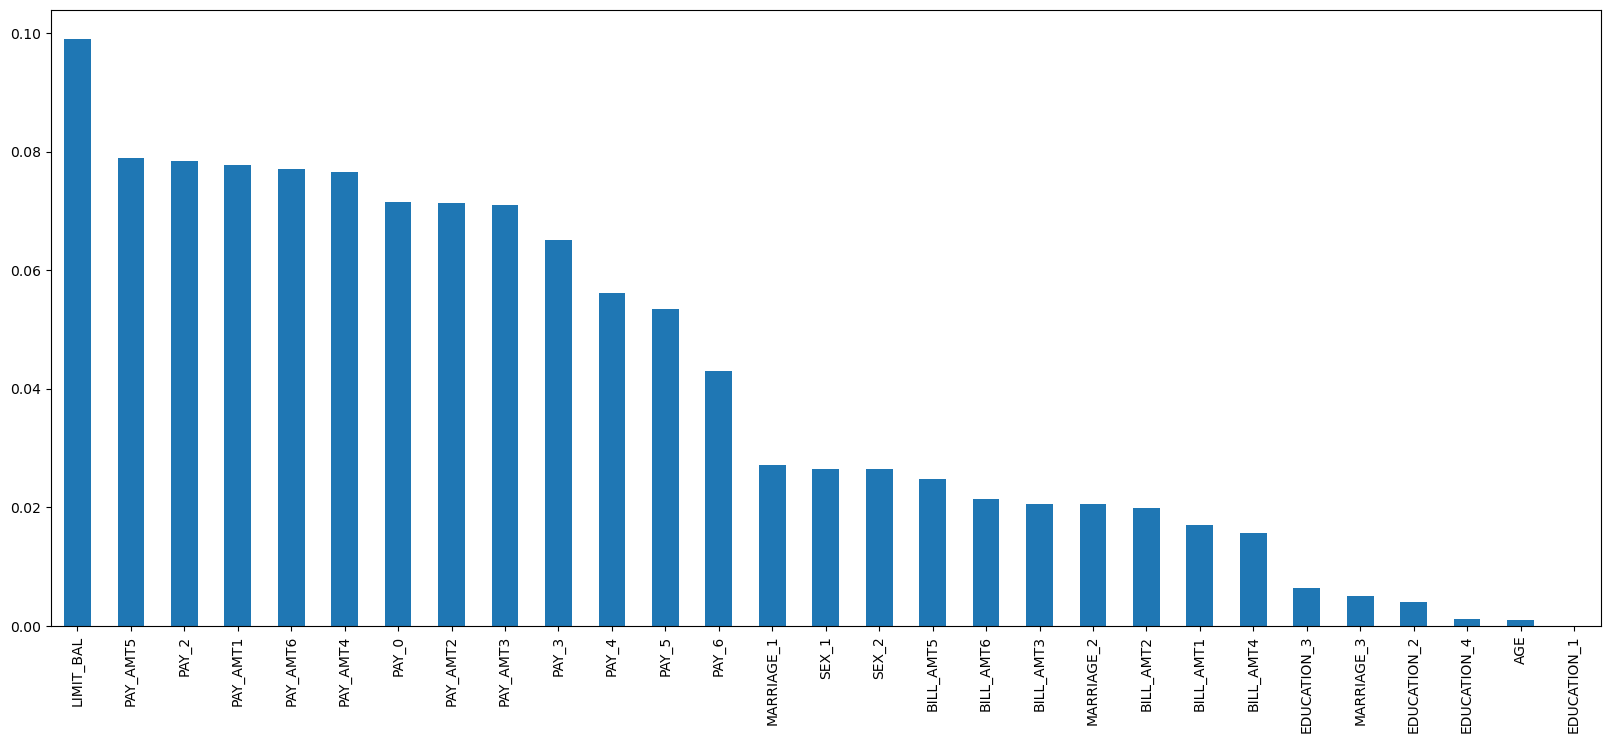

In [31]:
# Plot
mutual_info.sort_values(ascending = False).plot.bar(figsize =(20,8))

None of the features seems to be a very strong predictor of the target variable.

In [32]:
# Select the best features
best = mutual_info.index[0:15].to_list()

# Preview
best

['LIMIT_BAL',
 'PAY_AMT5',
 'PAY_2',
 'PAY_AMT1',
 'PAY_AMT6',
 'PAY_AMT4',
 'PAY_0',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'MARRIAGE_1',
 'SEX_1']

> **I varied the number of features selected and ran the model. I saw that choosing around 15 features gave me the highest model accuracy.**

I made sure that when changing the random_state of `mutual_info_classif`, i get the same top 14 important features consistently.

In [33]:
# Filtering features
X_train = X_train[best]

X_test = X_test[best]

X_train.head()

,LIMIT_BAL,PAY_AMT5,PAY_2,PAY_AMT1,PAY_AMT6,PAY_AMT4,PAY_0,PAY_AMT2,PAY_AMT3,PAY_3,PAY_4,PAY_5,PAY_6,MARRIAGE_1,SEX_1
0,360000.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,1.0,0.0
1,20000.0,0.0,2,0.0,602.0,1373.0,1,1325.0,1258.0,0,0,0,2,0.0,1.0
2,150000.0,5000.0,0,54190.0,5000.0,5000.0,0,6000.0,5000.0,0,0,0,0,1.0,0.0
3,130000.0,4400.0,2,0.0,4570.0,10200.0,2,6230.0,5000.0,0,0,0,2,1.0,0.0
4,50000.0,1900.0,2,2100.0,1900.0,2000.0,2,2000.0,1500.0,2,2,2,2,0.0,0.0


<Axes: >

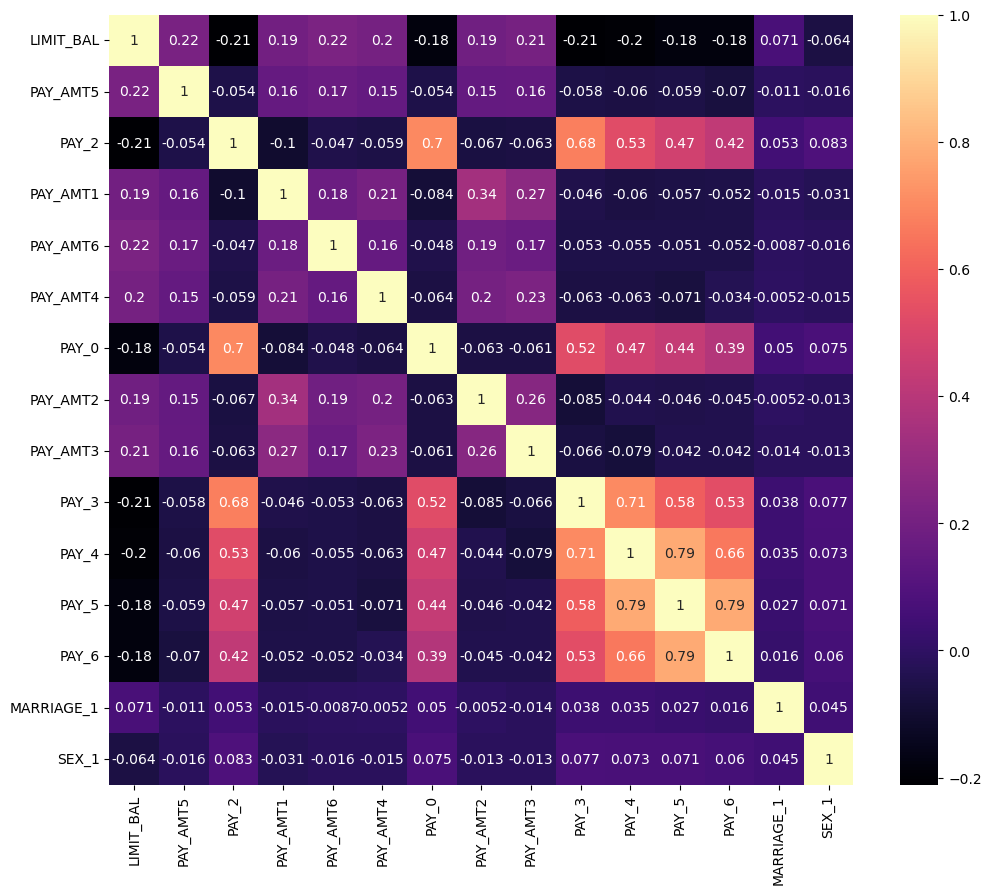

In [34]:
# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,cmap='magma')

## Modelling

We will be first testing multiple classifier models to compare.

In [35]:
# List of models to compare
models = {
    'Logistic Regression':LogisticRegression(random_state=43),
    'Linear SVC':LinearSVC(random_state=45),
    'Decision Tree':DecisionTreeClassifier(random_state=43),
    'K-nearest Neighbhour':KNeighborsClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=43),
    'Random Forest':RandomForestClassifier(random_state=43)
}

train_score = {}
test_score=[]

In [36]:
for i in range(len(list(models))):
    
    #Select model
    model = list(models.values())[i]
    
    # Train model
    model.fit(X_train,y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    
    print('Model performance for training set \n')
    
    print(f" Training performance of {list(models.keys())[i]}: \n",classification_report(y_train, y_train_pred))
    
    print('Model performance for testing set \n')
    
    print(f" Testing performance of {list(models.keys())[i]}: \n",classification_report(y_test, y_test_pred))
    
    print("ROC-AUC score:",round(roc_auc_score(y_test,y_test_pred),3))
    
    print('='*35)
    
    # Store train score in dictionary
    train_score[list(models.keys())[i]] = round(classification_report(y_train, y_train_pred,output_dict=True)['macro avg']['f1-score'],2)
    
    # Get test score
    test_score.append(round(classification_report(y_test, y_test_pred,output_dict=True)['macro avg']['f1-score'],2))

Model performance for training set 

 Training performance of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     17554
           1       0.00      0.00      0.00     17554

    accuracy                           0.50     35108
   macro avg       0.25      0.50      0.33     35108
weighted avg       0.25      0.50      0.33     35108

Model performance for testing set 

 Testing performance of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      5810
           1       0.00      0.00      0.00      1690

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.68      7500

ROC-AUC score: 0.5


C:\Users\anand\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand\Anaconda3\lib\site-packages\sklearn\metr

Model performance for training set 

 Training performance of Linear SVC: 
               precision    recall  f1-score   support

           0       0.50      0.87      0.63     17554
           1       0.49      0.13      0.20     17554

    accuracy                           0.50     35108
   macro avg       0.49      0.50      0.42     35108
weighted avg       0.49      0.50      0.42     35108

Model performance for testing set 

 Testing performance of Linear SVC: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      5810
           1       0.25      0.15      0.19      1690

    accuracy                           0.70      7500
   macro avg       0.51      0.51      0.50      7500
weighted avg       0.66      0.70      0.68      7500

ROC-AUC score: 0.508
Model performance for training set 

 Training performance of Decision Tree: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.

**Metric - F1 score**

- I chose **F1 score** as our metric since accuracy is a poor metric for unbalanced data. 

- F1-score was chosen over precison or recall since in this use case, we are equally interested in minimising False Positives and False Negatives.

- I specifically chose **macro average of F1-score** since the f1-score for each individual class is varying significantly. For weighted average, resulting performance is based on the proportion of every class. So in order to prevent f1 score of one class significantly biasing the average, i chose macro average since it does not consider the proportion of classes.

In [37]:
# Convert train accuracy to dataframe
m_acc = pd.DataFrame(train_score.items(),columns = ['model','train_f1_score'])

# Add test score
m_acc['test_f1_score'] = test_score

# Preview
m_acc.sort_values('train_f1_score',ascending=False)

,model,train_f1_score,test_f1_score
2,Decision Tree,0.99,0.58
5,Random Forest,0.99,0.66
3,K-nearest Neighbhour,0.82,0.55
4,Gradient Boosting Classifier,0.77,0.66
1,Linear SVC,0.42,0.50
0,Logistic Regression,0.33,0.44


I will be choosing Gradient Boosting Classifier.

### Hyperparameter Tuning

In [38]:
# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

In [39]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [40]:
# # GB Classifier
# gb = GradientBoostingClassifier()

# random_search = RandomizedSearchCV(estimator=gb, 
#                                    param_distributions=param_grid, 
#                                    n_iter=10, 
#                                    scoring='f1_macro',
#                                    cv=skf,
#                                    verbose=2, 
#                                    random_state=43)

# random_search.fit(X_train, y_train)

In [41]:
# best_params = random_search.best_params_

# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)


In [42]:
# # Results
# pd.DataFrame(random_search.cv_results_).T

In [43]:
# # Save best hyperparameters to json
# with open(PATH + r'gb_best_params.json', 'w') as fp:
#     json.dump(random_search.best_params_, fp)

In [44]:
# Load json
with open(PATH + r'gb_best_params.json', 'r') as fp:
    best_params = json.load(fp)

In [45]:
# Tuned random forest model
best_gb = GradientBoostingClassifier(**best_params, random_state=43)
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=200, random_state=43, subsample=0.8)

In [46]:
# Best parameters
best_params

{'subsample': 0.8,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'learning_rate': 0.1}

In [47]:
# Make predictions
y_train_pred = best_gb.predict(X_train)
y_test_pred = best_gb.predict(X_test)

print(f" Training performance of Random Forest: \n",classification_report(y_train, y_train_pred))

print(f" Testing performance of Random Forest: \n",classification_report(y_test, y_test_pred))

print("ROC-AUC score:",round(roc_auc_score(y_test,y_test_pred),3))

 Training performance of Random Forest: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     17554
           1       0.86      0.80      0.83     17554

    accuracy                           0.83     35108
   macro avg       0.83      0.83      0.83     35108
weighted avg       0.83      0.83      0.83     35108

 Testing performance of Random Forest: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      5810
           1       0.45      0.49      0.47      1690

    accuracy                           0.75      7500
   macro avg       0.65      0.66      0.65      7500
weighted avg       0.76      0.75      0.75      7500

ROC-AUC score: 0.658


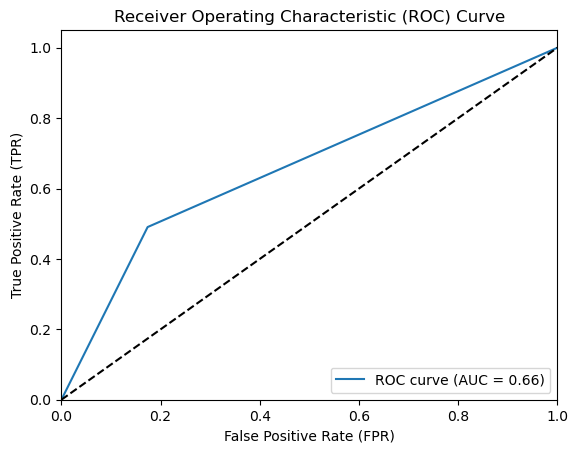

In [48]:
# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

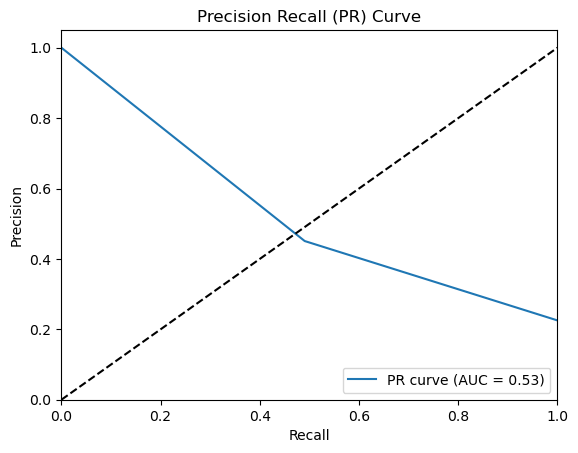

In [49]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)

# Compute the area under the PR curve (AUC)
pr = auc(recall, precision)

# Plot the ROC curve
plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % pr)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall (PR) Curve')
plt.legend(loc="lower right")
plt.show()

## Export model

In [50]:
# Model filename
filename = r'gb_model.pickle'

In [51]:
# Export file
pk.dump(best_gb, open(EXPORT+filename, 'wb'))